<a href="https://colab.research.google.com/github/StupichevA/Linal_Lab_PCA/blob/main/Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [309]:
import random

In [310]:
class Matrix:
    def __init__(self, rows, cols, data=None):
        self.rows = rows
        self.cols = cols

        if data is not None:
            if len(data) != rows or any(len(row) != cols for row in data):
                raise ValueError("Размеры данных не соответствуют указанным rows и cols")
            self.data = data
        else:
            self.data = [[0 for _ in range(cols)] for _ in range(rows)]

    def sum(self, other):
        if self.rows != other.rows or self.cols != other.cols:
            raise ValueError("Матрицы разные")

        result = Matrix(self.rows, self.cols)
        for i in range(self.rows):
            for j in range(self.cols):
                result.data[i][j] = self.data[i][j] + other.data[i][j]
        return result

    def increase(self, scalar):
        result = Matrix(self.rows, self.cols)

        for i in range(self.rows):
            for j in range(self.cols):
                result.data[i][j] = self.data[i][j] * scalar
        return result

    def mult(self, other):
        if self.cols != other.rows:
            raise ValueError("Количество столбцов и строк разное")

        result = Matrix(self.rows, other.cols)
        for i in range(self.rows):
            for j in range(other.cols):
                sum_val = 0
                for k in range(self.cols):
                    sum_val += self.data[i][k] * other.data[k][j]
                result.data[i][j] = sum_val
        return result

    def get_column(self, col_index):
        if col_index < 0 or col_index >= self.cols:
            raise IndexError("Столбец за границей")

        return [row[col_index] for row in self.data]

    def det(self):
      m = [[self.data[i][j] for j in range(self.cols)] for i in range(self.rows)]
      n = self.rows
      det = 1

      for i in range(n):

          x = i
          if m[i][i] == 0:
              flag = True
              for y in range(i + 1, n):
                  if m[y][i] != 0:
                      flag = False
                      x = y
                      break
              if flag:
                  return 0
              else:
                  m[i], m[x] = m[x], m[i]
                  det *= -1

          det *= m[i][i]
          for j in range(i + 1, n):
              factor = m[j][i] / m[i][i]
              for k in range(i, n):
                  m[j][k] -= factor * m[i][k]

      return det

    def corner_det(self, n):
      minor_data = [[self.data[i][j] for j in range(n)] for i in range(n)]
      minor = Matrix(n, n, minor_data)

      return minor.det()

    def __str__(self):
        return '\n'.join([' '.join(map(str, row)) for row in self.data])


In [311]:
def adaptive_pivot(A):
    max_abs = max(abs(x) for row in A.data for x in row)
    return max(1e-12, 1e-3 * max_abs)

In [312]:
def gauss_solver(A: Matrix, b: Matrix) -> list[Matrix]:
    EPS = 1e-12
    PIVOT_TOL = adaptive_pivot(A)

    if not A.data or not b.data:
        raise ValueError("Матрица пуста")

    if A.rows != A.cols:
        raise ValueError("Матрица должна быть квадратной")

    if A.rows != b.rows or b.cols != 1:
        raise ValueError("Несоответствие размеров матрицы и вектора")

    n = A.rows
    A = [row.copy() for row in A.data]
    b = [row.copy() for row in b.data]

    lead = 0
    rank = 0

    for r in range(n):
        if lead >= n:
            break

        i = r
        while abs(A[i][lead]) <= EPS:
            i += 1
            if i == n:
                i = r
                lead += 1
                if n == lead:
                    break

        if lead >= n:
            break

        A[i], A[r] = A[r], A[i]
        b[i], b[r] = b[r], b[i]

        pivot = A[r][lead]
        if abs(pivot) > PIVOT_TOL:
            for j in range(lead, n):
                A[r][j] /= pivot
            b[r][0] /= pivot

            for k in range(n):
                if k != r and abs(A[k][lead]) > EPS:
                    factor = A[k][lead]
                    for j in range(lead, n):
                        A[k][j] -= factor * A[r][j]
                    b[k][0] -= factor * b[r][0]

            lead += 1
            rank += 1

    for i in range(rank, n):
        if abs(b[i][0]) > EPS:
            raise ValueError("Система несовместна")

    basis = []
    free_vars = [True] * n

    for i in range(rank):
        for j in range(n):
            if abs(A[i][j] - 1) <= EPS:
                free_vars[j] = False
                break

    for j in range(n):
        if free_vars[j]:
            vec = [0.0] * n
            vec[j] = 1.0

            for i in range(rank):
                for k in range(n):
                    if abs(A[i][k] - 1) <= EPS:
                        vec[k] = -A[i][j]
                        break

            basis.append(vec)

    return [Matrix(n, 1, [[x] for x in vec]) for vec in basis]

In [313]:
data = [[0.008334716019305306, 2.44530303030303, -0.412676767676766], [2.44530303030303, 885.2208650190495, 110.87626262626263], [-0.412676767676766, 110.87626262626263, 341.0471276453123]]
X = Matrix(3,3,data)
b = Matrix(3,1,[[0], [0], [0]])
res = gauss_solver(X, b)
print(*res)

-0.0
1.0
0.0 455.04720220761504
0.0
1.0


In [314]:
A = Matrix(3,3,[
    [1, 2, 3],
    [1, 2, 3],
    [7, 8, 9]
])
b = Matrix(3,1,[[1], [1], [3]])
res = gauss_solver(A, b)
print(*res)

B = Matrix(2,2,[[0.7015621066093445, 2.0],
[2.0, 5.7015621066093445]])
a = Matrix(2,1,[[0],[0]])
r = gauss_solver(B, a)
print(*r)

1.0
-2.0
1.0
-2.8507811085550454
1.0


In [315]:
def center_data(X: Matrix) -> Matrix:
  """
  Вход: матрица данных X (n×m)
  Выход: центрированная матрица X_centered (n×m)
  """
  cols = X.cols
  rows = X.rows
  Centered_X = Matrix(rows, cols)
  Centered_X.data = [row.copy() for row in X.data]

  means = [sum(X.get_column(i)) / rows for i in range(cols)]

  for row in range(rows):
    for col in range(cols):
      Centered_X.data[row][col] -= means[col]

  return Centered_X

X = Matrix(3,3, [[1,2,3],[1,3,5],[1,4,6]])
print(center_data(X))

0.0 -1.0 -1.666666666666667
0.0 0.0 0.33333333333333304
0.0 1.0 1.333333333333333


In [316]:
def T(X: Matrix) -> Matrix:
  cols = X.cols
  rows = X.rows
  X_T = Matrix(cols, rows)
  for row in range(rows):
    for col in range(cols):
      X_T.data[col][row] = X.data[row][col]

  return X_T

X = Matrix(3,3, [[1,2,3],[1,3,5],[1,4,6]])
print(T(X))

1 1 1
2 3 4
3 5 6


In [317]:
def covariance_matrix(X_centered: Matrix) -> Matrix:
  """
  Вход: центрированная матрица X_centered (n×m)
  Выход: матрица ковариаций C (m×m)
  """
  cols = X_centered.cols
  rows = X_centered.rows
  E = T(X_centered).mult(X_centered).increase(1/(rows - 1))

  return E

X = Matrix(3,3, [[1,2,3],[1,3,5],[1,4,6]])
cov_matrix = covariance_matrix(center_data(X))

In [318]:
def sturm_sequence(A: Matrix, lambd: float):
    n = A.rows
    A_l = Matrix(n, A.cols)

    for i in range(n):
      for j in range(A.cols):
          A_l.data[i][j] = A.data[i][j]
      A_l.data[i][i] -= lambd

    D = [1, A_l.data[0][0]]
    for i in range(2, n + 1):
      D.append(A_l.corner_det(i))

    return D

def count_sign_changes(sequence):
    count = 0
    for i in range(1, len(sequence)):
        if sequence[i-1]*sequence[i] < 0:
            count += 1
    return count

def bisection_eigenvalues(A, a, b, epsilon=1e-6, max_depth=100):
    eigenvalues = []

    def bisect(a, b, depth=0):
        nonlocal eigenvalues

        if depth > max_depth:
            return

        s_a = count_sign_changes(sturm_sequence(A, a))
        s_b = count_sign_changes(sturm_sequence(A, b))


        n_eigen = abs(s_b - s_a)

        if n_eigen == 0:
            return
        elif n_eigen == 1:
            while b - a > epsilon:
                mid = (a + b)/2
                s_mid = count_sign_changes(sturm_sequence(A, mid))
                if s_mid - s_a == 0:
                    a = mid
                else:
                    b = mid
            eigenvalues.append((a + b)/2)
        else:
            mid = (a + b)/2
            bisect(a, mid, depth+1)
            bisect(mid, b, depth+1)

    bisect(a, b)
    return sorted(eigenvalues)

In [319]:
X = Matrix(3,3, [[0.04959090909090908, 2.44530303030303, -0.412676767676766], [2.44530303030303, 885.2621212121211, 110.87626262626263], [-0.412676767676766, 110.87626262626263, 341.0883838383839]])
bisection_eigenvalues(X, 0, 1000)


[0.041256193071603775, 319.3668113090098, 906.9920289330184]

In [320]:
def find_eigenvectors(C: Matrix, eigenvalues: list[float]) -> list[Matrix]:
    """
    Вход:
    C: матрица ковариаций (m×m)
    eigenvalues: список собственных значений
    Выход: список собственных векторов (каждый вектор - объект Matrix)
    """
    n = C.rows
    eigenvectors = []

    I = Matrix(n, n)
    for i in range(n):
        I.data[i][i] = 1

    Z = Matrix(n, 1)

    for l in eigenvalues:
        C_minus_lambda = C.sum(I.increase(-l))

        null_space_basis = gauss_solver(C_minus_lambda, Z)

        for vec in null_space_basis:
            sum_squares = 0
            for j in range(n):
                sum_squares += (vec.data[j][0])**2

            norm_factor = 1 / (sum_squares**0.5)
            eigenvectors.append(vec.increase(norm_factor))

    return eigenvectors

M = Matrix(3,3, [[0,-0.42,-0.64],[0,0.083,0.11],[0,0.33,0.53]])
eigenvalues = bisection_eigenvalues(X, 0, 1000)

eigenvectors = find_eigenvectors(X, eigenvalues)
for eigenvector in eigenvectors:
  print(eigenvector, "\n")


-0.0
1.0
0.0 

0.9999975853425218
0.0
0.0021975689126120007 

-0.002740587231737273
-0.1922627220451706
0.9813396633650383 

0.0025584043492799524
0.9813387889809692
0.19226969550230927 



In [321]:
def explained_variance_ratio(eigenvalues: list[float], k: int) -> float:
    """
    Вход:
    eigenvalues: список собственных значений
    k: число компонент
    Выход: доля объяснённой дисперсии
    """
    if sum(eigenvalues) != 0:
      return sum(eigenvalues[:k]) / sum(eigenvalues)
    else:
      return 1

def full_explained_variance_ratio(eigenvalues: list[float]) -> list[float]:
  e_v_sum = sum(eigenvalues)
  return [value / e_v_sum for value in eigenvalues]

In [322]:
def handle_missing_values(X: Matrix) -> Matrix:
    """
    Вход: матрица данных X (n*m) с возможными NaN
    Выход: матрица данный X_filled (n*m) без NaN
    """
    import math

    rows = X.rows
    cols = X.cols


    X_filled = Matrix(rows, cols)
    for i in range(rows):
        for j in range(cols):
            X_filled.data[i][j] = X.data[i][j]

    for j in range(cols):
        column = X.get_column(j)
        valid_values = [value for value in column if not math.isnan(value)]

        if not valid_values:
            mean_value = 0.0
        else:
            mean_value = sum(valid_values) / len(valid_values)

        for i in range(rows):
            if math.isnan(X_filled.data[i][j]):
                X_filled.data[i][j] = mean_value

    return X_filled

In [323]:
def project_data(X: Matrix, components: list) -> Matrix:
    """Проецирование данных на главные компоненты."""
    rows = X.rows
    cols = X.cols
    k = len(components)

    projected = Matrix(rows, k)

    for i in range(rows):
        for j in range(k):
            projected.data[i][j] = sum(X.data[i][l] * components[j].data[l][0] for l in range(cols))

    return projected

In [324]:
def pca(X: Matrix, k: int, with_threshold: bool = False, threshold: float = 0.95, with_full_e_v_r: bool = False) -> tuple[Matrix, float or list[float]]:
    """
    Вход:
    X: матрица данных (n×m)
    k: число главных компонент
    Выход:
    X_proj: проекция данных (n×k)
    : доля объяснённой дисперсии
    """
    X_centered = center_data(X)

    cov_matrix = covariance_matrix(X_centered)

    eigenvalues = bisection_eigenvalues(cov_matrix, -1, 10000)[::-1]
    eigenvectors = find_eigenvectors(cov_matrix, eigenvalues)

    if with_threshold:
      sum_eigenvalues = sum(eigenvalues)
      holder = 0
      i = 0

      while holder < threshold:
        holder += eigenvalues[i] / sum_eigenvalues
        i += 1
      k = i

    top_k_eigenvectors = eigenvectors[:k]

    projected_data = project_data(X_centered, top_k_eigenvectors)

    if with_full_e_v_r:
      e_v_r_data = full_explained_variance_ratio(eigenvalues)
      return projected_data, e_v_r_data

    explained_variance = explained_variance_ratio(eigenvalues, k)

    return projected_data, explained_variance


X = Matrix(3,3, [[1,2,3],[1,3,5],[1,4,6]])
t = pca(X, 2, with_threshold=True, threshold=0.99999)
print(t[0], '\n')
print(t[1])

-1.9424006064039867 -0.06969701245541449
0.2794974189033344 0.18163784919376996
1.6629031875006515 -0.11194083673835586 

0.9999999365856709


In [325]:
from sklearn.decomposition import PCA

X = [[1,2,3],[1,3,5],[1,4,6]]

Pca = PCA(n_components=3)
X_pca = Pca.fit_transform(X)

print("Преобразованные данные:\n", X_pca)
print("Объясненная дисперсия:", Pca.explained_variance_ratio_)

Преобразованные данные:
 [[-1.9424006   0.069697    0.        ]
 [ 0.27949741 -0.18163785  0.        ]
 [ 1.66290319  0.11194085  0.        ]]
Объясненная дисперсия: [0.99244289 0.00755711 0.        ]


In [326]:
from matplotlib.figure import Figure
import matplotlib.pyplot as plt

def plot_pca_projection(X_proj: Matrix, show_lines=True) -> Figure:
    """
    Вход:
      - X_proj: проекция данных (n×2)
      - show_lines: если True, рисует отрезки проекции
    Выход: объект Figure
    """
    fig = Figure(figsize=(8, 8))
    ax = fig.add_subplot(111)

    x = [row[0] for row in X_proj.data]
    y = [row[1] for row in X_proj.data]

    ax.scatter(x, y, alpha=0.7, edgecolors='k', s=80, label='Projected Points')

    if show_lines:
        for xi, yi in zip(x, y):
            ax.plot([0, xi], [0, yi], 'r--', alpha=0.4, lw=1)

        ax.scatter([0], [0], c='red', s=100, marker='+', label='Center')

    ax.set_title('PCA Projection')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.axhline(0, color='gray', lw=0.5)
    ax.axvline(0, color='gray', lw=0.5)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()

    return fig

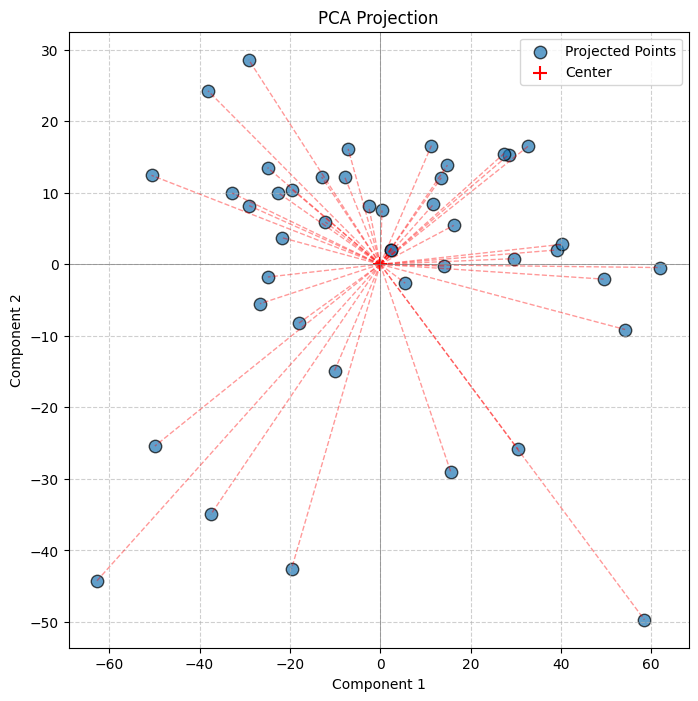

In [334]:
projected_data = t[0]

fig = plot_pca_projection(projected_data)
fig

In [329]:
def reconstruction_error(X_orig: Matrix, X_recon: Matrix) -> float:
    """
    Вход:
    X_orig: исходные данные (n×m)
    X_recon: восстановленные данные (n×m)
    Выход: среднеквадратическая ошибка MSE
    """
    n = X_orig.rows
    m = X_orig.cols
    total_squared_error = 0.0

    for i in range(n):
        for j in range(m):
            total_squared_error += (X_orig.data[i][j] - X_recon.data[i][j]) ** 2

    return total_squared_error / (n * m)



X = Matrix(3,3, [[1,2,3],[1,3,5],[1,4,6]])
t = pca(X, 3)
print(reconstruction_error(X, t[0]))

12.083461590581395


In [330]:
def add_noise_and_compare(X: 'Matrix', noise_level: float = 0.1, k: int = None, explained_variance_threshold: float = 0.95):
    min_vals = [float('inf')] * X.cols
    max_vals = [float('-inf')] * X.cols

    for j in range(X.cols):
        for i in range(X.rows):
            min_vals[j] = min(min_vals[j], X.data[i][j])
            max_vals[j] = max(max_vals[j], X.data[i][j])

    X_noisy = Matrix(X.rows, X.cols)

    for j in range(X.cols):
        data_range = max_vals[j] - min_vals[j]
        noise_std = data_range * noise_level

        for i in range(X.rows):
            noise = random.gauss(0, noise_std)
            X_noisy.data[i][j] = X.data[i][j] + noise

    original_projected, original_variance = pca(
        X, k)

    noisy_projected, noisy_variance = pca(
        X_noisy, k)

    original_centered = center_data(X)
    noisy_centered = center_data(X_noisy)

    original_cov = covariance_matrix(original_centered)
    noisy_cov = covariance_matrix(noisy_centered)

    original_eigenvalues = bisection_eigenvalues(original_cov, -1, 10000)[::-1]
    noisy_eigenvalues = bisection_eigenvalues(noisy_cov, -1, 10000)[::-1]

    mse = reconstruction_error(X, X_noisy)

    results = {
        "Исходные данные": {
            "Проекция": original_projected,
            "Объясненная дисперсия": original_variance,
            "Собственные значения": original_eigenvalues[:min(5, len(original_eigenvalues))]
        },
        "Зашумленные данные": {
            "Проекция": noisy_projected,
            "Объясненная дисперсия": noisy_variance,
            "Собственные значения": noisy_eigenvalues[:min(5, len(noisy_eigenvalues))]
        },
        "Сравнение": {
            "MSE между исходными и зашумленными данными": mse,
            "Разница в объясненной дисперсии": noisy_variance - original_variance
        }
    }

    return results

In [331]:
def print_noise_comparison_results(results):
    print("=" * 50)
    print("СРАВНЕНИЕ PCA ДО И ПОСЛЕ ДОБАВЛЕНИЯ ШУМА")
    print("=" * 50)

    print("\nИСХОДНЫЕ ДАННЫЕ:")
    print("-" * 30)
    print(f"Объясненная дисперсия: {results['Исходные данные']['Объясненная дисперсия']:.4f}")
    print("Собственные значения (топ-5):", [round(val, 4) for val in results['Исходные данные']['Собственные значения']])
    print("\nПроекция данных:")
    print(results['Исходные данные']['Проекция'])
    # orig_plot = plot_pca_projection(results['Исходные данные']['Проекция'])
    # print(orig_plot)

    print("\nЗАШУМЛЕННЫЕ ДАННЫЕ:")
    print("-" * 30)
    print(f"Объясненная дисперсия: {results['Зашумленные данные']['Объясненная дисперсия']:.4f}")
    print("Собственные значения (топ-5):", [round(val, 4) for val in results['Зашумленные данные']['Собственные значения']])
    print("\nПроекция данных:")
    print(results['Зашумленные данные']['Проекция'])
    # plot_pca_projection(results['Зашумленные данные']['Проекция'])
    # noisy_plot = plot_pca_projection(results['Зашумленные данные']['Проекция'])


    print("\nРЕЗУЛЬТАТЫ СРАВНЕНИЯ:")
    print("-" * 30)
    print(f"MSE между исходными и зашумленными данными: {results['Сравнение']['MSE между исходными и зашумленными данными']:.6f}")
    print(f"Разница в объясненной дисперсии: {results['Сравнение']['Разница в объясненной дисперсии']:.6f}")

    if results['Сравнение']['Разница в объясненной дисперсии'] > 0:
        print("Шум увеличил объясненную дисперсию.")
    elif results['Сравнение']['Разница в объясненной дисперсии'] < 0:
        print("Шум уменьшил объясненную дисперсию.")
    else:
        print("Шум не повлиял на объясненную дисперсию.")

    print("=" * 50)

In [332]:
X = Matrix(3,3, [[1,2,3],[1,3,5],[1,4,6]])
comparison_results = add_noise_and_compare(X, 0.2, 2)
print_noise_comparison_results(comparison_results)

СРАВНЕНИЕ PCA ДО И ПОСЛЕ ДОБАВЛЕНИЯ ШУМА

ИСХОДНЫЕ ДАННЫЕ:
------------------------------
Объясненная дисперсия: 1.0000
Собственные значения (топ-5): [3.3081, 0.0252, 0.0]

Проекция данных:
-1.9424006064039867 -0.06969701245541449
0.2794974189033344 0.18163784919376996
1.6629031875006515 -0.11194083673835586

ЗАШУМЛЕННЫЕ ДАННЫЕ:
------------------------------
Объясненная дисперсия: 1.0000
Собственные значения (топ-5): [2.9308, 0.0061, 0.0]

Проекция данных:
-1.841830907272775 -0.032814164140005486
0.2991563802293301 0.08931086382368264
1.542674527043447 -0.05649669968367643

РЕЗУЛЬТАТЫ СРАВНЕНИЯ:
------------------------------
MSE между исходными и зашумленными данными: 0.110584
Разница в объясненной дисперсии: -0.000000
Шум уменьшил объясненную дисперсию.


In [333]:
import kagglehub
import pandas as pd
from kagglehub import KaggleDatasetAdapter

file_path = "movies.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "allubie/imdbs-top-44-movies",
  file_path,
)

df = df[['Rating', 'Runtime (minutes)', 'Year']]
data = df.values.tolist()
X = Matrix(len(data), len(data[0]), data)
t = pca(X, X.rows, with_full_e_v_r=True)
print("Объясненная дисперсия:", t[1])
print(reconstruction_error(X, t[0]))




Pca = PCA(n_components=3)
X_pca = Pca.fit_transform(data)
X_pca_m = Matrix(len(X_pca), len(X_pca[0]), X_pca)

print("Объясненная дисперсия:", Pca.explained_variance_ratio_)
print(reconstruction_error(X, X_pca_m))


comparison_results = add_noise_and_compare(X, 0.1, 2)
print_noise_comparison_results(comparison_results)

<ipython-input-333-a97de3846f69>:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


Объясненная дисперсия: [0.7395563910857537, 0.2604099690430782, 3.363987116817163e-05]
1329721.3743849343
Объясненная дисперсия: [7.39556391e-01 2.60409969e-01 3.36400230e-05]
1329495.1919345357
СРАВНЕНИЕ PCA ДО И ПОСЛЕ ДОБАВЛЕНИЯ ШУМА

ИСХОДНЫЕ ДАННЫЕ:
------------------------------
Объясненная дисперсия: 1.0000
Собственные значения (топ-5): [949.1777, 334.2211, 0.0432]

Проекция данных:
2.3738111364814554 2.0577670088140207
30.527802080089153 -25.876101350432382
14.878207221408928 13.874717253220425
-49.88277520406543 -25.406619093312393
54.191473914714656 -9.112400681514792
62.002203588519535 -0.45258037915022875
14.148853246536582 -0.2482894193489158
15.634417505175978 -29.071364988975137
39.046616206227824 2.0070569569863563
0.38986403531026226 7.542623785141619
2.372531934305691 2.0591373024310546
11.336879770854779 16.606995585131326
40.21996884889968 2.796407957177668
-17.98359782689289 -8.218614931710677
-2.5544081730738255 8.119686009629167
5.52855247597298 -2.634998180088198